In [1]:
import pathlib
from itertools import chain, product

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import Phylo
from elyawy.constants import length_distributions, indel_models
plt.style.use('seaborn-v0_8-colorblind')

all_models = set(tuple("_".join(i) for i in (product(length_distributions, indel_models))))

In [19]:
dataset = 'eggnog'
corrected = True
# REMOTE_PATH = pathlib.Path("/run/user/1000/kio-fuse-oBBdtE/sftp/elyawygoda@powerlogin.tau.ac.il:22/groups/pupko/elyawygoda/length_distributions/all_outputs/results/").resolve() # sys.argv[2]
REMOTE_PATH = pathlib.Path("/run/user/1000/gvfs/sftp:host=power.tau.ac.il,user=elyawygoda/groups/pupko/elyawygoda/length_distributions/all_outputs/results/").resolve() # sys.argv[2]

REMOTE_PATH = REMOTE_PATH / dataset
all_outputs_path = pathlib.Path(REMOTE_PATH).resolve()
# all_outputs_path = chain(all_outputs_path.glob("*Primates*"),all_outputs_path.glob("*Rodent*"))

all_outputs_path = list(all_outputs_path.iterdir())



In [20]:
def add_missing_models(df_: pd.DataFrame):
    for model in all_models:
        if not len(df_[df_.model == model]):
            missing_row = {col:0.0 for col in df_.columns}
            missing_row["model"] = model
            missing_row = pd.DataFrame(missing_row, index=[0])
            df_ = pd.concat([df_, missing_row])
    df_ = df_.set_index("model")
    df_= df_.fillna(0.0).astype('float')
    return df_

In [21]:
all_outputs_path = [folder for folder in all_outputs_path if (folder / "epsilon_mahal_500000_corrected.csv").exists()]


In [22]:
len(all_outputs_path)

416

In [23]:
# sum_branches = []
# filtered_outputs_path = []
# for dir_name in all_outputs_path:
#     tree_path = (dir_name / f"{dir_name.stem}_NT.tree").resolve()
#     tree = Phylo.read(tree_path, 'newick')
#     sum_branch_lengths = tree.total_branch_length()
#     if sum_branch_lengths > 7:
#         sum_branches.append(sum_branch_lengths)
#         filtered_outputs_path.append(dir_name)

# all_outputs_path = filtered_outputs_path

abc_winner = []
datasets_list = []
duplicate_count = 0
for dir_name in all_outputs_path:
    if corrected:
        epsilon_results = pathlib.Path(dir_name, "epsilon_mahal_500000_corrected.csv")
    else:
        epsilon_results = pathlib.Path(dir_name, "epsilon_mahal_500000_non_corrected.csv")
    if not epsilon_results.exists():
        continue
    datasets_list.append(dir_name.stem)
    temp_df = pd.read_csv(epsilon_results)
    temp_df["model"] = temp_df["length_distribution"] + "_" + temp_df["indel_model"]
    temp_df = temp_df.drop(columns=["length_distribution","indel_model"])
    temp_df = add_missing_models(temp_df)
    def get_max(x: pd.Series):
        sorted_x = x.sort_values(ascending=False)
        last_val = -1
        groups_ = []
        for key,val in sorted_x.items():
            if last_val != val:
                groups_.append([])
                last_val = val
            groups_[-1].append(key)
        return ",".join(sorted(groups_[0]))
    abc_winner.append(temp_df.apply(get_max, axis=0))

corrected = "corrected" if corrected else "not_corrected"


In [24]:
summary_df  = pd.concat(abc_winner, axis=1)
summary_df.columns = datasets_list
summary_df

,Bacillus_1ZARG,Bacillus_1ZART,Bacillus_1ZAS4,Bacillus_1ZAXF,Bacillus_1ZAYH,Bacillus_1ZB8G,Bacillus_1ZB8K,Bacillus_1ZBRJ,Bacillus_1ZC1Z,Bacillus_1ZC31,...,Vibrionales_1XUED,Vibrionales_1XUGH,Vibrionales_1XUIU,Vibrionales_1XUQD,Vibrionales_1XUR3,Vibrionales_1XVEY,Vibrionales_1XVT4,Vibrionales_1XW2N,Vibrionales_1XW8K,Vibrionales_1Y2F6
10,zipf_rim,"zipf_rim,zipf_sim",zipf_rim,zipf_sim,zipf_sim,zipf_rim,zipf_rim,zipf_rim,zipf_rim,geometric_rim,...,"zipf_rim,zipf_sim",zipf_rim,geometric_rim,zipf_rim,geometric_rim,zipf_rim,zipf_rim,zipf_rim,geometric_rim,geometric_rim
25,zipf_sim,zipf_sim,zipf_rim,zipf_sim,zipf_sim,zipf_rim,zipf_rim,zipf_rim,zipf_rim,geometric_rim,...,zipf_rim,zipf_rim,geometric_rim,zipf_rim,geometric_rim,zipf_rim,zipf_rim,zipf_rim,geometric_rim,geometric_rim
50,"zipf_rim,zipf_sim",zipf_sim,zipf_rim,"zipf_rim,zipf_sim",zipf_sim,zipf_rim,zipf_rim,zipf_rim,zipf_rim,geometric_rim,...,zipf_rim,zipf_rim,geometric_rim,zipf_rim,geometric_rim,zipf_rim,zipf_rim,zipf_rim,geometric_rim,geometric_rim
100,zipf_sim,zipf_sim,zipf_rim,zipf_sim,zipf_sim,zipf_rim,zipf_rim,zipf_rim,zipf_rim,geometric_rim,...,zipf_rim,zipf_rim,geometric_rim,zipf_rim,geometric_rim,zipf_rim,zipf_rim,zipf_rim,geometric_rim,geometric_rim
250,zipf_rim,zipf_sim,zipf_rim,zipf_sim,zipf_sim,zipf_rim,zipf_rim,zipf_rim,zipf_rim,geometric_rim,...,zipf_rim,zipf_rim,geometric_rim,zipf_rim,geometric_rim,zipf_rim,zipf_rim,zipf_rim,geometric_rim,geometric_rim
500,zipf_rim,zipf_sim,zipf_rim,zipf_sim,zipf_sim,zipf_rim,zipf_rim,zipf_rim,zipf_rim,geometric_rim,...,zipf_rim,zipf_rim,geometric_rim,zipf_rim,geometric_rim,zipf_rim,zipf_rim,zipf_rim,geometric_rim,geometric_rim
1000,zipf_rim,zipf_sim,zipf_rim,zipf_sim,zipf_sim,zipf_rim,zipf_rim,zipf_rim,zipf_rim,geometric_rim,...,zipf_sim,zipf_rim,geometric_rim,zipf_rim,geometric_rim,zipf_rim,zipf_rim,zipf_rim,geometric_rim,geometric_rim


In [25]:
def get_simplified_class(x):
    current_dataset, classification = x.values
    classification = classification.split(",")[0].split("_")[0]

    print(current_dataset, classification)
    return classification

In [26]:
class_summary = summary_df.T["100"].reset_index()

In [27]:
class_summary["short_class"] = class_summary.apply(get_simplified_class , axis=1)

Bacillus_1ZARG zipf
Bacillus_1ZART zipf
Bacillus_1ZAS4 zipf
Bacillus_1ZAXF zipf
Bacillus_1ZAYH zipf
Bacillus_1ZB8G zipf
Bacillus_1ZB8K zipf
Bacillus_1ZBRJ zipf
Bacillus_1ZC1Z zipf
Bacillus_1ZC31 geometric
Bacillus_1ZC4R zipf
Bacillus_1ZCEM zipf
Bacillus_1ZD65 zipf
Bacillus_1ZDK0 poisson
Bacillus_1ZDP7 poisson
Bacillus_1ZEBR zipf
Bacillus_1ZEIJ zipf
Bacillus_1ZES9 geometric
Bacillus_1ZEZQ poisson
Bacillus_1ZPVT zipf
Bacillus_1ZQHG zipf
Bacillus_1ZRBN poisson
Bacillus_1ZRCN zipf
Bacillus_1ZS18 zipf
Bacillus_1ZS6K zipf
Bacillus_1ZSAH zipf
Brassicales_3HMN0 zipf
Brassicales_3HN7F zipf
Brassicales_3HPMQ zipf
Brassicales_3HQ7D zipf
Brassicales_3HQJD zipf
Brassicales_3HRBM zipf
Brassicales_3HSAH zipf
Brassicales_3HSFN zipf
Brassicales_3HSNV zipf
Brassicales_3HSQP zipf
Brassicales_3HTDJ zipf
Brassicales_3HVDA zipf
Brassicales_3HVZ5 zipf
Brassicales_3HWAJ zipf
Brassicales_3HWED zipf
Brassicales_3HWIV zipf
Brassicales_3HWM8 geometric
Brassicales_3HWPW zipf
Brassicales_3HWT2 zipf
Brassicales_3HX7

In [28]:
pd.Series(index=class_summary["index"], data=class_summary["short_class"].values).to_csv(REMOTE_PATH.parent / f"{dataset}_classifications.csv")

In [29]:

classifications = pd.read_csv(REMOTE_PATH.parent / f"{dataset}_classifications.csv", index_col="index")["0"]



In [31]:
summary_res = summary_df.apply(lambda x: x.value_counts(), axis=1)
summary_res = summary_res.fillna(0)
temp_df = summary_res.T

temp_df["model"] = temp_df.index
temp_df = temp_df.reset_index(level=0, drop=True)
temp_df = add_missing_models(temp_df)
temp_df = temp_df.T
temp_df.index.name = "index"
summary_res = temp_df
# temp_df["model"]
summary_res

model,geometric_rim,"geometric_rim,geometric_sim","geometric_rim,zipf_rim","geometric_rim,zipf_sim",geometric_sim,"geometric_sim,poisson_rim","geometric_sim,poisson_sim","geometric_sim,zipf_rim","geometric_sim,zipf_rim,zipf_sim","geometric_sim,zipf_sim",poisson_rim,"poisson_rim,zipf_rim","poisson_rim,zipf_sim",poisson_sim,"poisson_sim,zipf_sim",zipf_rim,"zipf_rim,zipf_sim",zipf_sim
index,,,,,,,,,,,,,,,,,,
10,47.0,0.0,3.0,1.0,13.0,1.0,1.0,0.0,1.0,2.0,22.0,1.0,1.0,5.0,1.0,165.0,26.0,126.0
25,45.0,1.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,6.0,0.0,178.0,4.0,142.0
50,49.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,7.0,0.0,170.0,5.0,146.0
100,50.0,0.0,0.0,1.0,14.0,0.0,0.0,1.0,0.0,0.0,28.0,0.0,0.0,6.0,0.0,169.0,2.0,145.0
250,52.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,1.0,23.0,0.0,0.0,5.0,0.0,170.0,1.0,151.0
500,50.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,6.0,0.0,170.0,1.0,148.0
1000,47.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,6.0,0.0,163.0,2.0,153.0


In [32]:
count_res = summary_df.loc[["100"],:].T.value_counts()
print(count_res)
count_res = count_res.reset_index()
count_res.columns = ["class", "count"]
count_sum = count_res["count"].sum()
# count_res = count_res.drop(index=[6])
count_sum

100                   
zipf_rim                  169
zipf_sim                  145
geometric_rim              50
poisson_rim                28
geometric_sim              14
poisson_sim                 6
zipf_rim,zipf_sim           2
geometric_rim,zipf_sim      1
geometric_sim,zipf_rim      1
dtype: int64


416

In [33]:
count_res["class"] = count_res["class"].apply(lambda x: x.split("_")[0])
count_groups = count_res.groupby("class")
count_groups.groups.keys()
group_sums = count_groups.sum()

In [34]:
count_res

,class,count
0,zipf,169
1,zipf,145
2,geometric,50
3,poisson,28
4,geometric,14
5,poisson,6
6,zipf,2
7,geometric,1
8,geometric,1


In [35]:
100*count_res.groupby(by="class").sum()/count_res["count"].sum()

,count
class,
geometric,15.865385
poisson,8.173077
zipf,75.961538


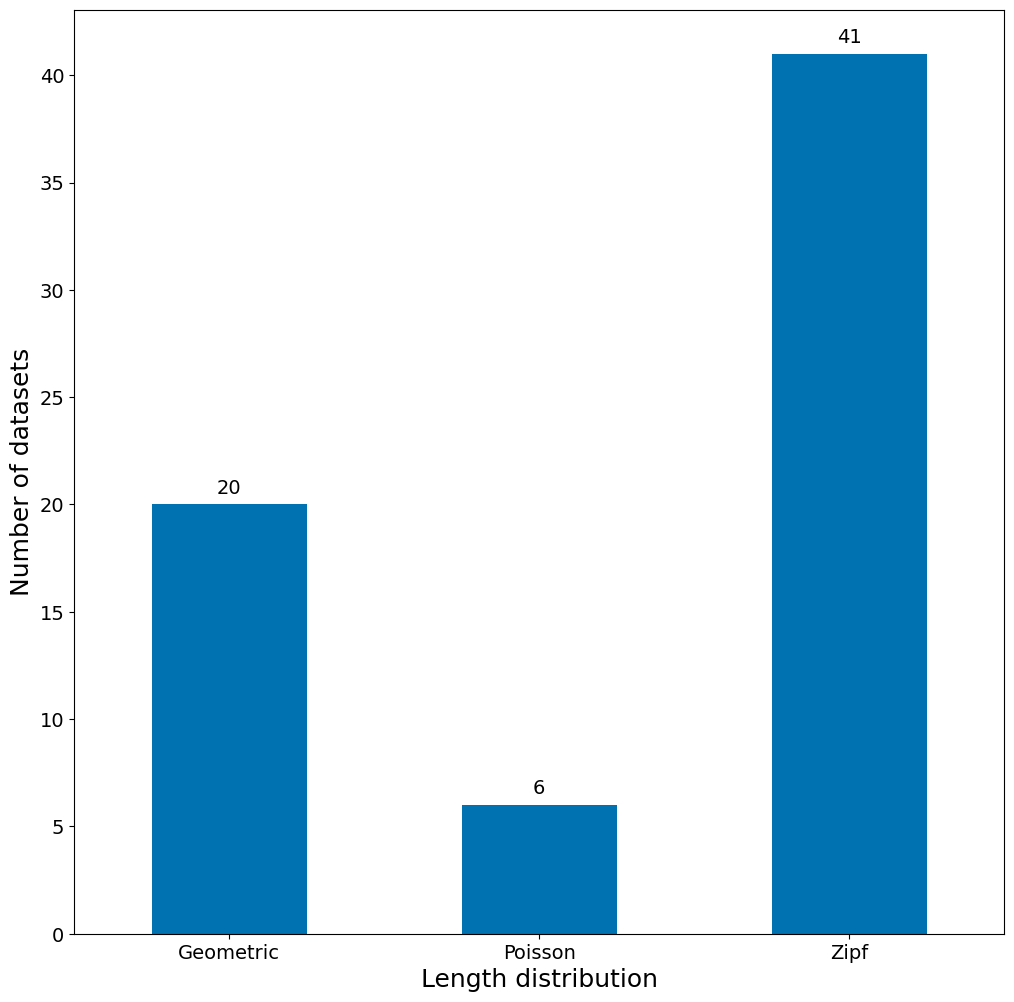

In [18]:
sns.set_style("ticks")

match_filter_counts.plot(kind="bar", ax=ax, legend=False, edgecolor="k", lw=3)
labels = [l.title() for l in match_filter_counts.index]

plt.yticks(size=24)
plt.xticks(ax.get_xticks(),labels=labels, rotation=0, size=24)

plt.ylabel("Number of datasets", size=28, labelpad=10)
plt.xlabel("Length distribution", size=28, labelpad=10)
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', size=24)

sns.despine()


plt.savefig(f"assets/{dataset}_hist_{corrected}.svg", bbox_inches="tight", dpi=200)

In [63]:
# summary_res = summary_res[list(all_models)]
summary_res = summary_res.loc["100"]
(summary_res/summary_res.sum() *100).to_csv(f"assets/{dataset}_{corrected}.csv")